In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Cargar el conjunto de datos iris y almacenarlo en la variable iris
iris = sns.load_dataset('iris')

# Crear una instancia de la clase StandardScaler
# Esta clase se utiliza para estandarizar los datos, es decir, para centrarlos en cero y escalarlos para que tengan varianza unitaria.
scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
    )

# Calcular la matriz de covarianza de los datos estandarizados y almacenarla en la variable covariance_matrix
covariance_matrix = np.cov(scaled.T)

# Mostrar la matriz de covarianza
covariance_matrix




array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

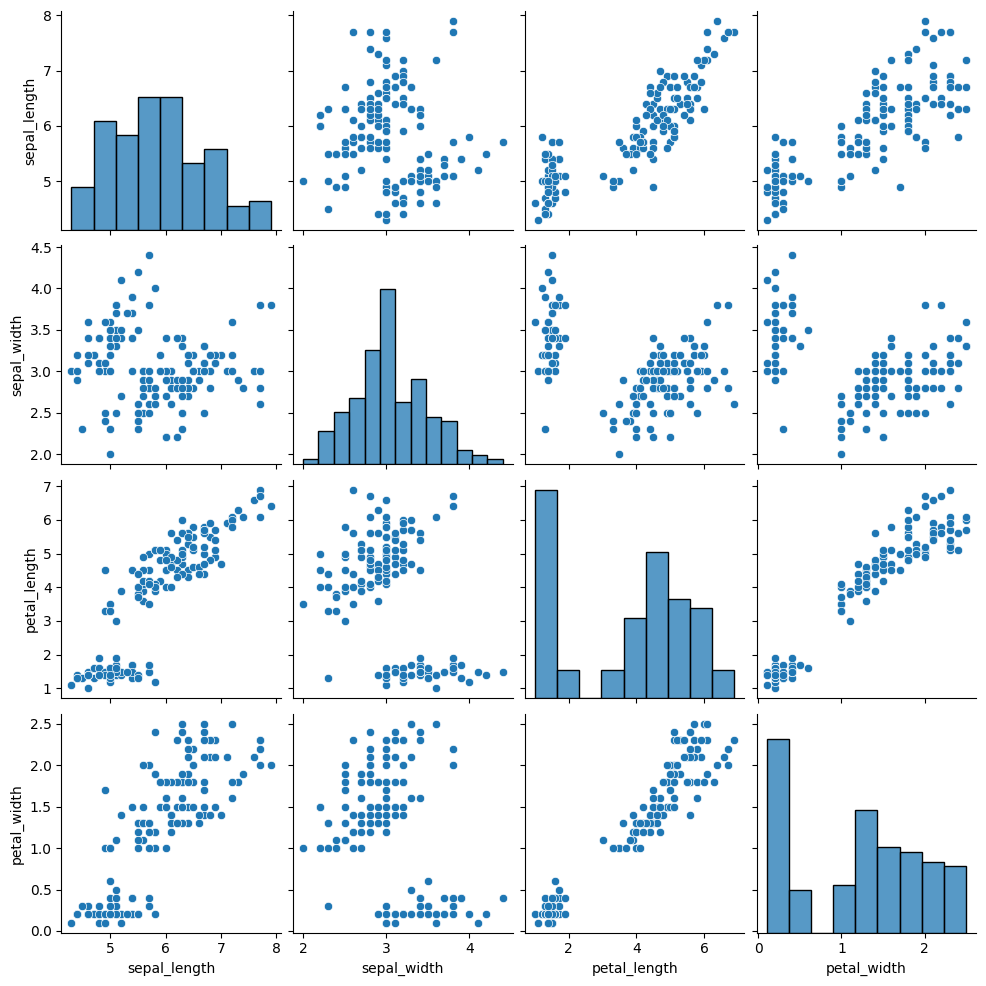

In [40]:
sns.pairplot(iris)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


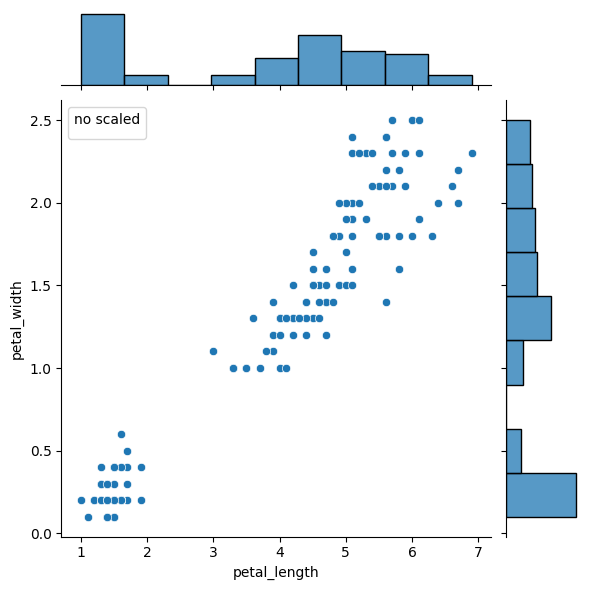

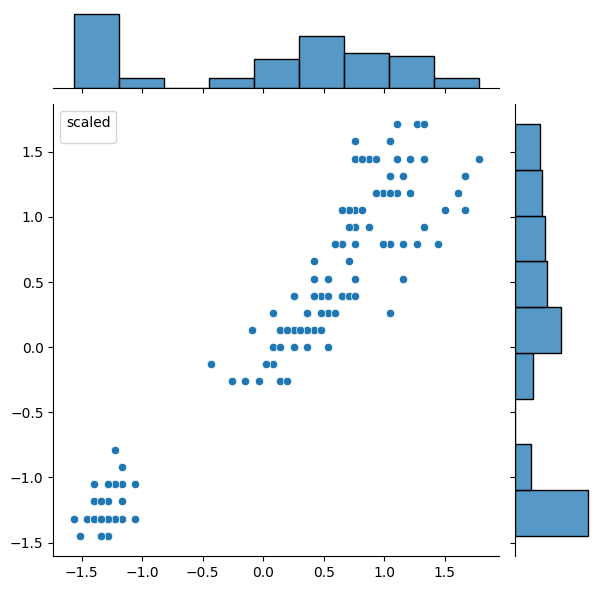

In [41]:
# crear un gráfico de dispersión utilizando Seaborn que muestra la relación entre la longitud del pétalo y el ancho del pétalo en el conjunto de datos de iris
sns.jointplot(x=iris['petal_length'], y=iris['petal_width'])
plt.legend(title='no scaled')


# crear otro gráfico de dispersión utilizando Seaborn que muestra la relación entre la longitud del pétalo y el ancho del pétalo en el conjunto de datos de iris después de haber sido estandarizadas
sns.jointplot(x=scaled[:, 2], y=scaled[:, 3])
plt.legend(title='scaled',loc = 'upper left')


Descomposicion en vectores y valores propios: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [53]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix) #est descompone la varianza en valores y vectores que son los valores propios 

In [54]:
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [55]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [58]:
variance_explained = []
for i in eigen_values:
    variance_explained.append((i/sum(eigen_values))*100)
# aqui es por cada valor en eigen_values dividelo entre la suma de todos y ponlo en variance_explained 
# de esta manera puedes sacar el porcentaje que vale cada eigen_values para escoger el mejor el que tiene mas porcentaje 
print(variance_explained)

[72.96244541329992, 22.85076178670171, 3.6689218892828683, 0.517870910715499]


PCA con scikit : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [48]:
# de esta manera los reduces a menos dimensiones con PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled)

PCA(n_components=2)

In [60]:
pca.explained_variance_ratio_
#esto teda las direcciones principales lo mismo que en variance_explained sin tanto codigo 

array([0.72962445, 0.22850762])

In [62]:
reduced_scaled = pca.transform(scaled) 
reduced_scaled
# de esta manera descompones los datos para entrenar el modelo 
#es como descomprimir los datos es 1 dato( o en este caso son 2) que contiene muchos datos  

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

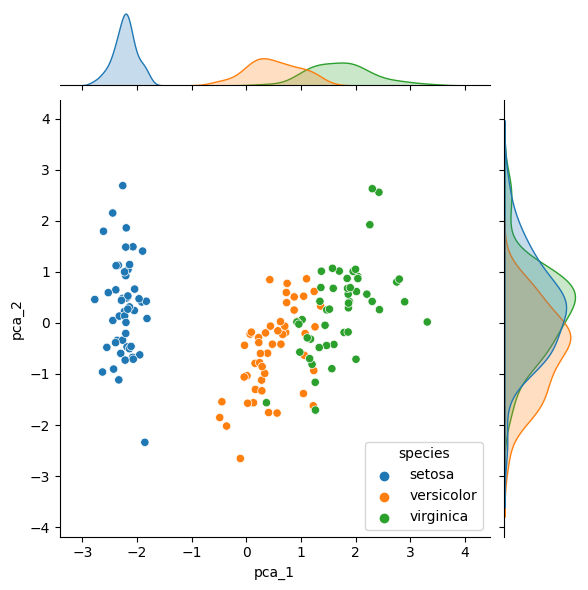

In [66]:
iris['pca_1'] = reduced_scaled[:, 0] # 0 es la primer componente osea el 72% de antes 
iris['pca_2'] = reduced_scaled[:, 1] # 1 es el 22 % de antes 
sns.jointplot(x = iris['pca_1'], y= iris['pca_2'], hue=iris['species'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3f569948-e9a8-454f-8f4d-a27aa1610a87' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>